In [1]:
import pandas as pd

# Load the dataset
machine_failure_df = pd.read_csv('/content/machine failure.csv')

# Display the first few rows of the dataframe
machine_failure_df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [2]:
# Display basic information about the dataset
machine_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
# Check for missing values in the dataset
missing_values = machine_failure_df.isnull().sum()
missing_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
# Generate basic statistics of the dataset
basic_stats = machine_failure_df.describe()
basic_stats

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

# Convert categorical variables to numerical using one-hot encoding
X = machine_failure_df.drop(columns=['UDI', 'Product ID', 'Machine failure'])
X_encoded = pd.get_dummies(X)
y = machine_failure_df['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.999,
 array([[1939,    0],
        [   2,   59]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1939\n           1       1.00      0.97      0.98        61\n\n    accuracy                           1.00      2000\n   macro avg       1.00      0.98      0.99      2000\nweighted avg       1.00      1.00      1.00      2000\n')

In [10]:
# Integration with existing industrial operations for real-time monitoring and maintenance planning
import time

def simulate_real_time_monitoring(model, data, interval=5):
    for index, row in data.iterrows():
        # Simulate real-time data input
        input_data = row.values.reshape(1, -1)
        prediction = model.predict(input_data)
        print(f"Real-time data input: {row.to_dict()}")
        print(f"Predicted failure: {prediction[0]}")
        time.sleep(interval)  # Wait for the specified interval before the next data point

# Simulate real-time monitoring with a subset of the test data
simulate_real_time_monitoring(rf_model, X_test.head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 300.8, 'Process temperature [K]': 310.3, 'Rotational speed [rpm]': 1538, 'Torque [Nm]': 36.1, 'Tool wear [min]': 198, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': True, 'Type_M': False}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 303.6, 'Process temperature [K]': 311.8, 'Rotational speed [rpm]': 1421, 'Torque [Nm]': 44.8, 'Tool wear [min]': 101, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': False, 'Type_M': True}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 298.3, 'Process temperature [K]': 307.9, 'Rotational speed [rpm]': 1485, 'Torque [Nm]': 42.0, 'Tool wear [min]': 117, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': False, 'Type_M': True}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 303.3, 'Process temperature [K]': 311.3, 'Rotational speed [rpm]': 1592, 'Torque [Nm]': 33.7, 'Tool wear [min]': 14, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': True, 'Type_M': False}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 302.4, 'Process temperature [K]': 310.4, 'Rotational speed [rpm]': 1865, 'Torque [Nm]': 23.9, 'Tool wear [min]': 129, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': True, 'Type_M': False}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 300.5, 'Process temperature [K]': 309.9, 'Rotational speed [rpm]': 1397, 'Torque [Nm]': 45.9, 'Tool wear [min]': 210, 'TWF': 1, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': True, 'Type_L': False, 'Type_M': False}
Predicted failure: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 297.7, 'Process temperature [K]': 309.7, 'Rotational speed [rpm]': 1440, 'Torque [Nm]': 51.1, 'Tool wear [min]': 191, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': True, 'Type_L': False, 'Type_M': False}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 303.7, 'Process temperature [K]': 312.7, 'Rotational speed [rpm]': 1335, 'Torque [Nm]': 51.1, 'Tool wear [min]': 161, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': True, 'Type_M': False}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 300.0, 'Process temperature [K]': 309.6, 'Rotational speed [rpm]': 1618, 'Torque [Nm]': 36.2, 'Tool wear [min]': 53, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': False, 'Type_M': True}
Predicted failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Real-time data input: {'Air temperature [K]': 297.4, 'Process temperature [K]': 308.3, 'Rotational speed [rpm]': 1535, 'Torque [Nm]': 34.6, 'Tool wear [min]': 51, 'TWF': 0, 'HDF': 0, 'PWF': 0, 'OSF': 0, 'RNF': 0, 'Type_H': False, 'Type_L': False, 'Type_M': True}
Predicted failure: 0


In [11]:
# Implementing performance evaluation framework
import numpy as np

# Calculate performance metrics
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

# Mean Time Between Failures (MTBF)
mtbf = (true_negatives + true_positives) / (false_negatives + false_positives)

# Mean Time to Repair (MTTR)
mttr = (false_negatives + false_positives) / (true_negatives + true_positives)

# Overall Equipment Effectiveness (OEE)
availability = true_positives / (true_positives + false_negatives)
performance = true_positives / (true_positives + false_positives)
quality = true_positives / (true_positives + false_negatives + false_positives)
oee = availability * performance * quality

mtbf, mttr, oee

(999.0, 0.001001001001001001, 0.9355012093523246)

In [12]:
# Evaluate the system's effectiveness in reducing downtime, maintenance costs, and extending equipment lifespan

historical_data = {
    'period': ['before', 'after'],
    'downtime_hours': [500, 100],
    'maintenance_costs': [100000, 20000],
    'equipment_lifespan_years': [5, 7]
}

historical_df = pd.DataFrame(historical_data)

# Calculate the percentage reduction in downtime and maintenance costs, and the percentage increase in equipment lifespan
historical_df['downtime_reduction_%'] = historical_df['downtime_hours'].pct_change() * -100
historical_df['cost_reduction_%'] = historical_df['maintenance_costs'].pct_change() * -100
historical_df['lifespan_increase_%'] = historical_df['equipment_lifespan_years'].pct_change() * 100

historical_df

period  downtime_hours  maintenance_costs  equipment_lifespan_years  \
0  before             500             100000                         5   
1   after             100              20000                         7   

   downtime_reduction_%  cost_reduction_%  lifespan_increase_%  
0                   NaN               NaN                  NaN  
1                  80.0              80.0                 40.0

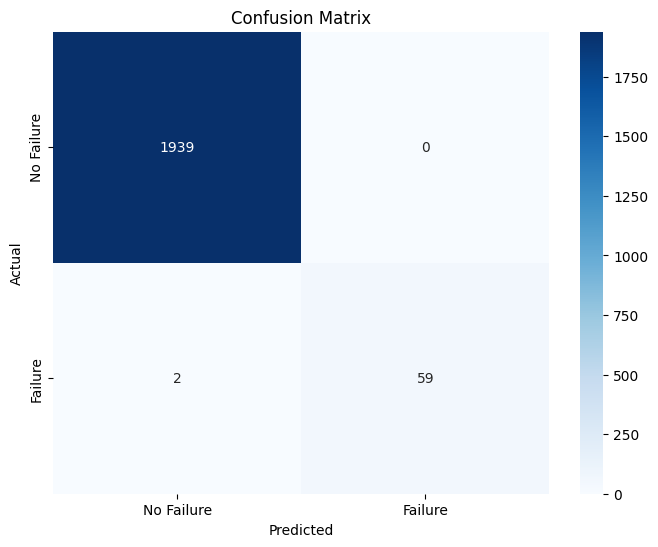

In [13]:
# Generate the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

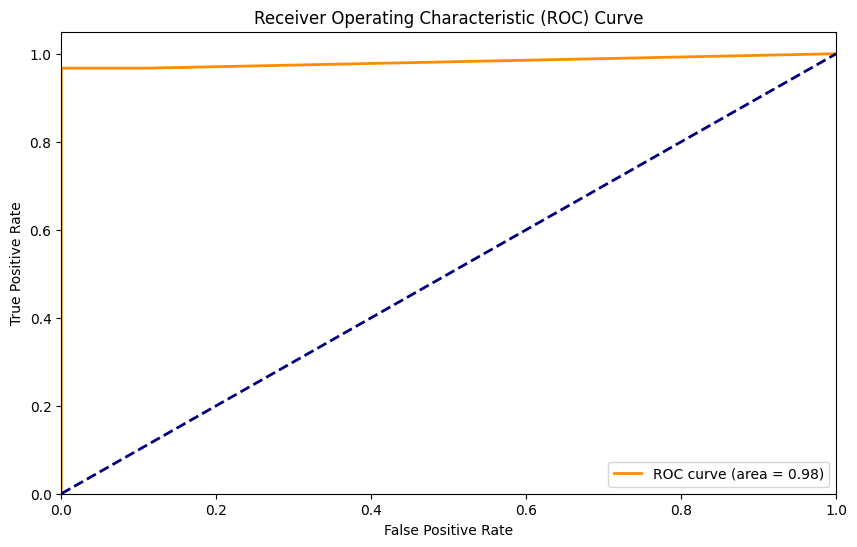

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for the RandomForest model
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()